In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.ticker import FuncFormatter

In [3]:
# Reading historical data from CSV
df = pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\RELIANCE1.csv', parse_dates=['Date'])
df = df[['Date', 'Close']]
df.columns = ['Date', 'Close']
print(df['Date'])

0      2018-07-13
1      2018-07-16
2      2018-07-17
3      2018-07-18
4      2018-07-19
          ...    
1228   2023-07-06
1229   2023-07-07
1230   2023-07-10
1231   2023-07-11
1232   2023-07-12
Name: Date, Length: 1233, dtype: datetime64[ns]


In [4]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Close']] = scaler.fit_transform(df[['Close']])

# Splitting the dataset into train and test sets
training_size = int(len(df) * 0.65)
test_size = len(df) - training_size
train_data, test_data = df.iloc[0:training_size], df.iloc[training_size:len(df)]

In [5]:
# Function to create supervised dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset['Close'].values[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset['Close'].values[i + time_step])
    return np.array(dataX), np.array(dataY)

In [6]:
# Reshaping input data for LSTM
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# Reshaping input to be [samples, time steps, features] required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 15s 251ms/step - loss: 0.1197 - val_loss: 0.1289
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0252 - val_loss: 0.0504
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0133 - val_loss: 0.0144
Epoch 4/100
13/13 [==============================] - 0s 32ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0012 - val_loss: 0.0104
Epoch 7/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 8/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 9/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 10/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0010 - val_loss: 0.00

In [10]:
# Predicting on training and testing data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [11]:
# Inverse transforming predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [12]:
# Calculating RMSE performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

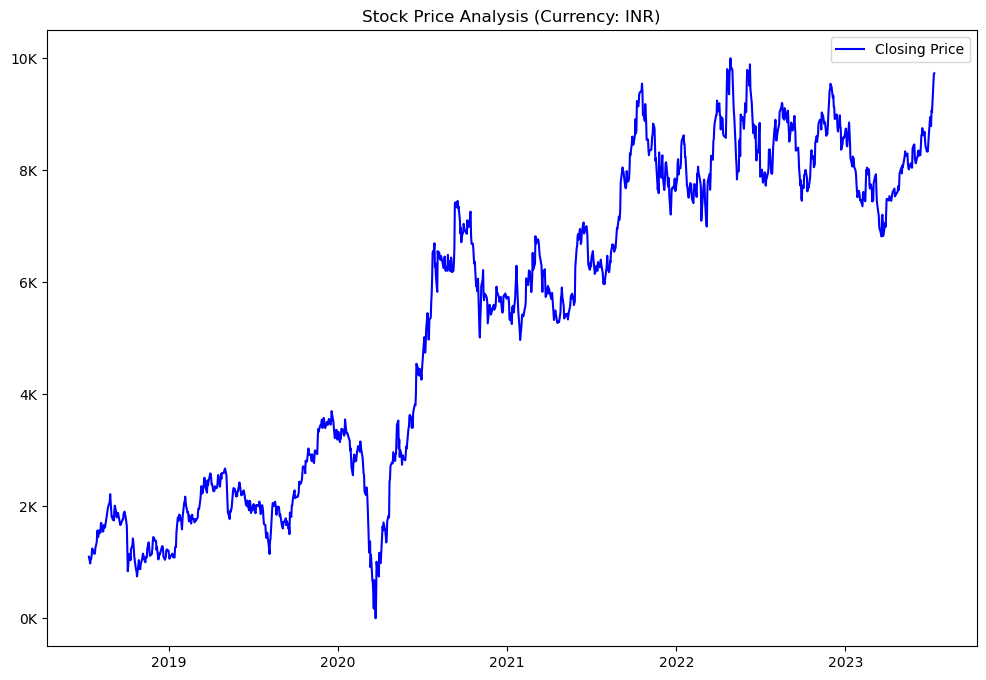

In [14]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.title('Stock Price Analysis (Currency: INR)')

plt.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
def format_y_ticks(x, pos):
    thousands = int(x*10)
    return f"{thousands}K"
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
plt.legend()
plt.show()